# Telco Customer Churn Prediction (Classification)

## Data

> **Source:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn, IBM Sample Data Sets <br>
> **Description:** The Telco customer churn data contains information about a fictional telco company that provided home phone and internet services to 7043 customers in California in Q3. It indicates which customers have left or stayed. <br>
> **Contents:**
- **Customer Account Information:** customer ID, tenure, contract type, payment method, paperless billing, monthly charges, and total charges
- **Customer Demographics:** gender, age (senior citizen or not), and if they have partners and dependents
- **Services Availed:** phone service, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- **Churn:** whether the customer left or stayed

## Questions
> What are the characteristics of customers who churned? <br>
> What is the distribution of customers who didn't churn in terms of churn risk (low, medium, high)? <br>
> Which factors affect churn prediction the most?

## Data Cleaning

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline

In [ ]:
pd.set_option('display.max_columns', None)

**Load Data**

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Duplicate Values**

In [ ]:
df.customerID.nunique()

7043

**Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Drop Columns**

In [ ]:
df.drop('customerID', axis='columns', inplace=True)

**Missing Values**

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


*TotalCharges is null because tenure is 0. <br>*

**Drop Null Rows**

In [ ]:
df = df.dropna(subset=['TotalCharges'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df_churn = df[df['Churn'] == 'Yes']
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
df_nonchurn = df[df['Churn'] == 'No']
df_nonchurn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## EDA

In [ ]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

### Categorical Columns

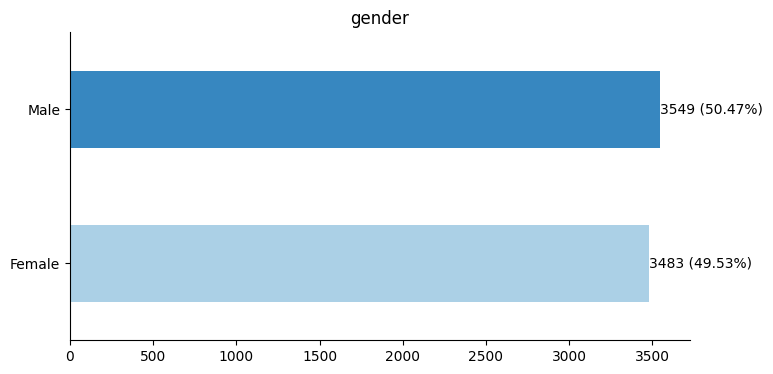

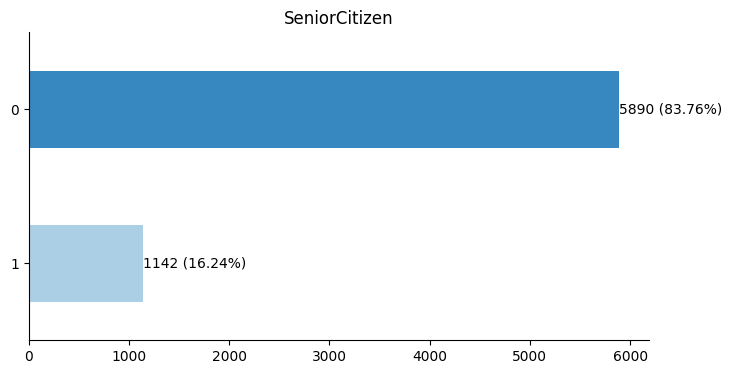

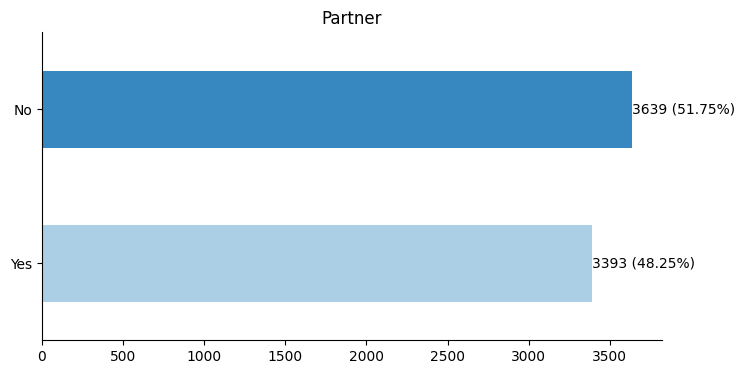

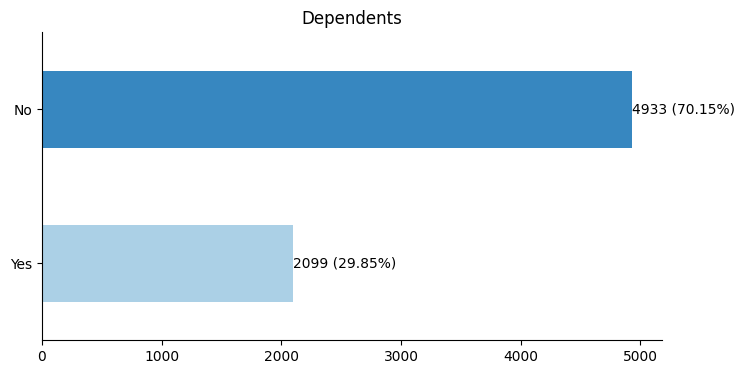

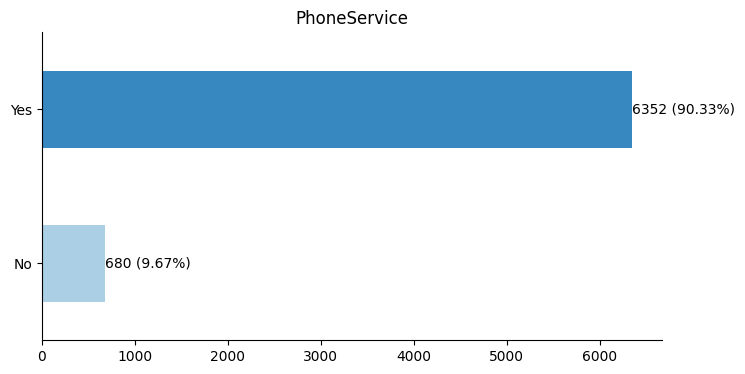

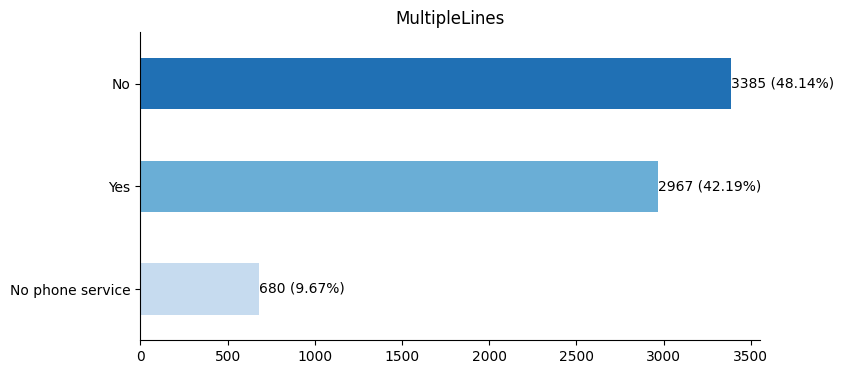

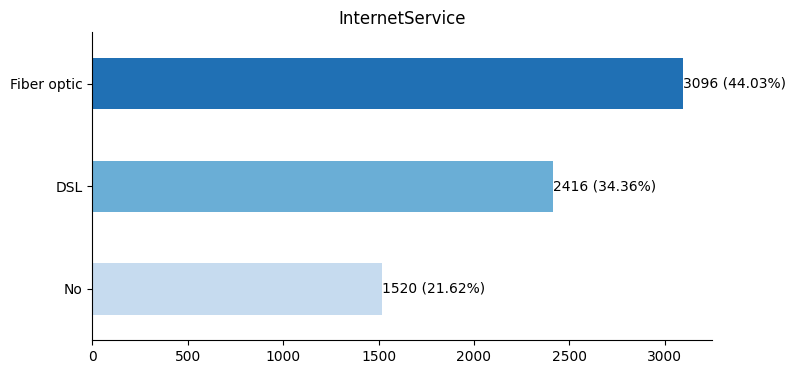

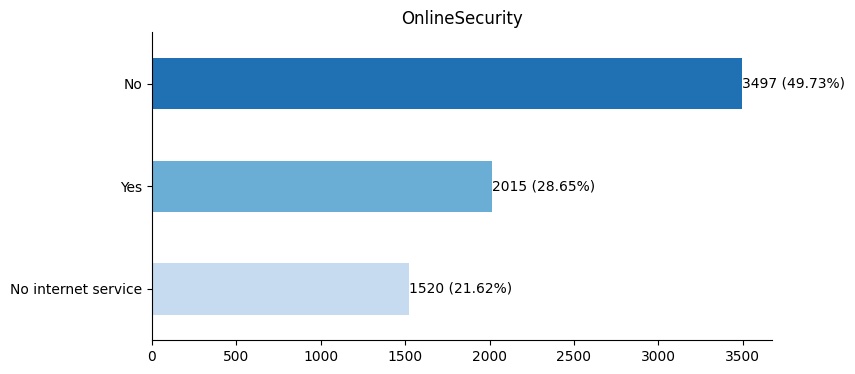

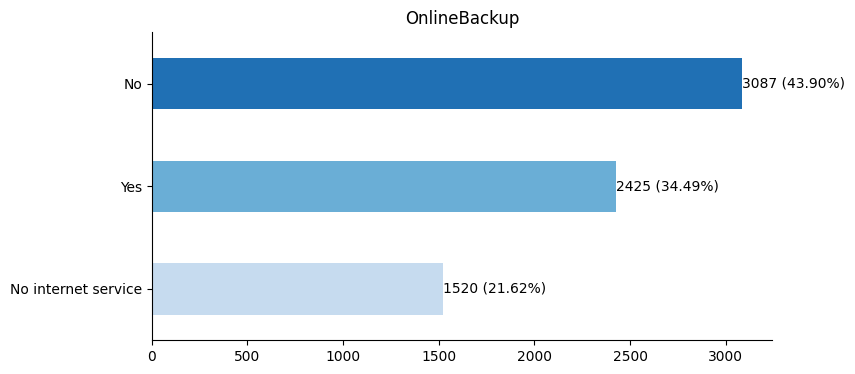

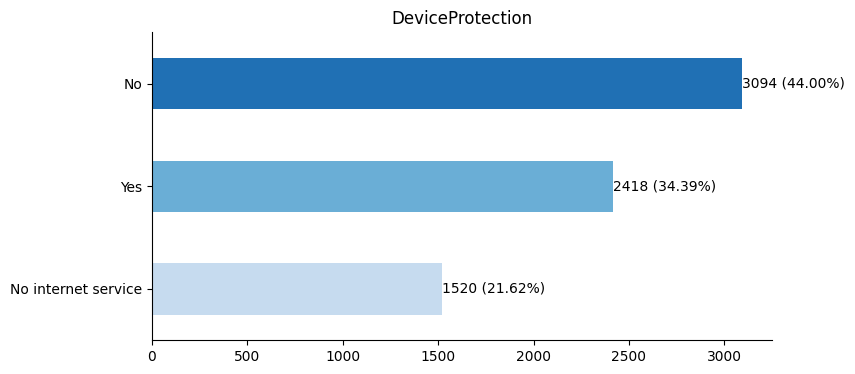

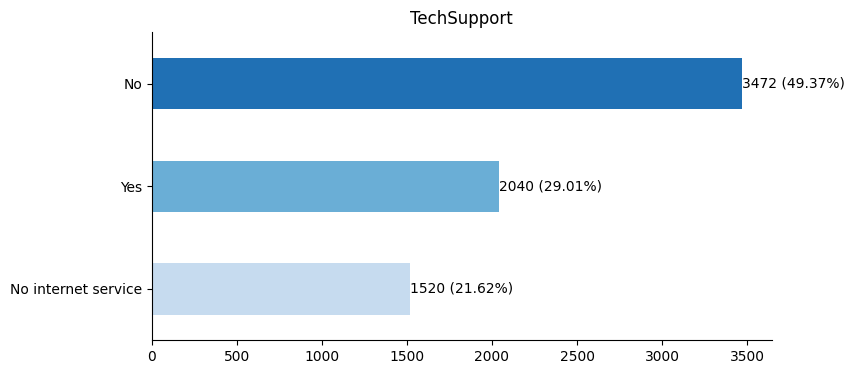

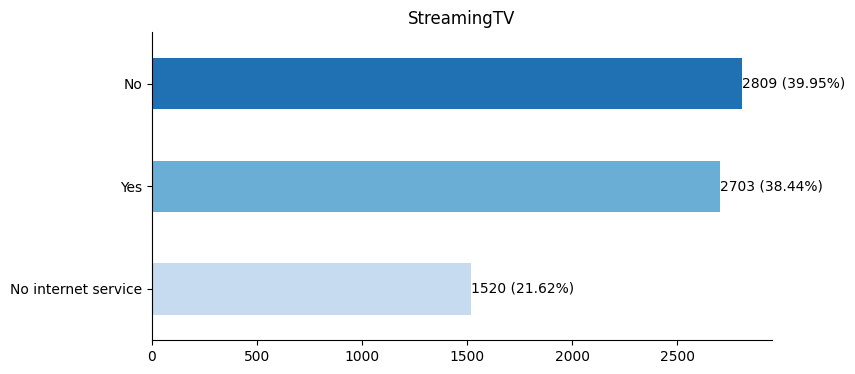

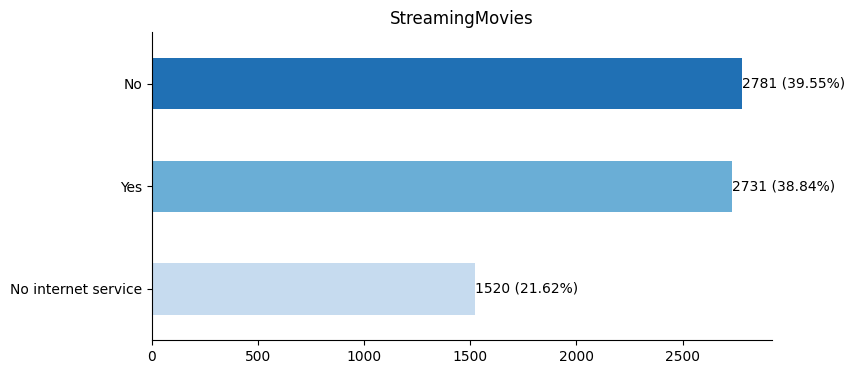

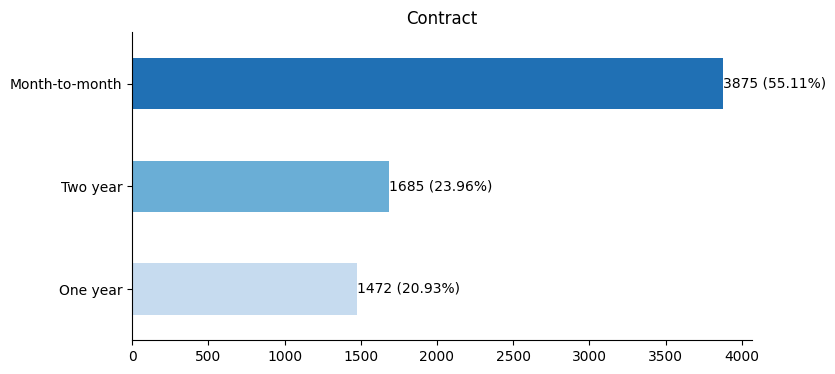

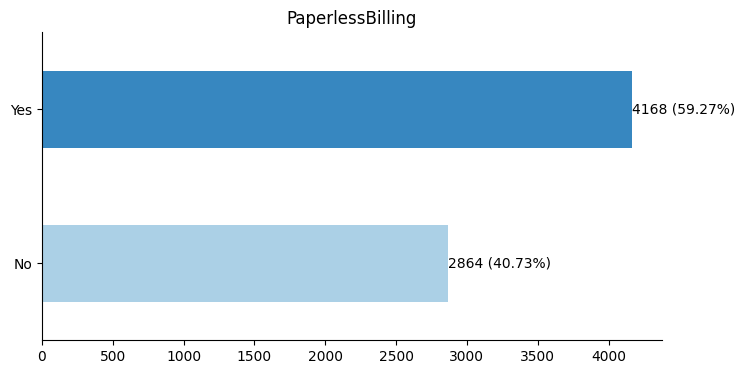

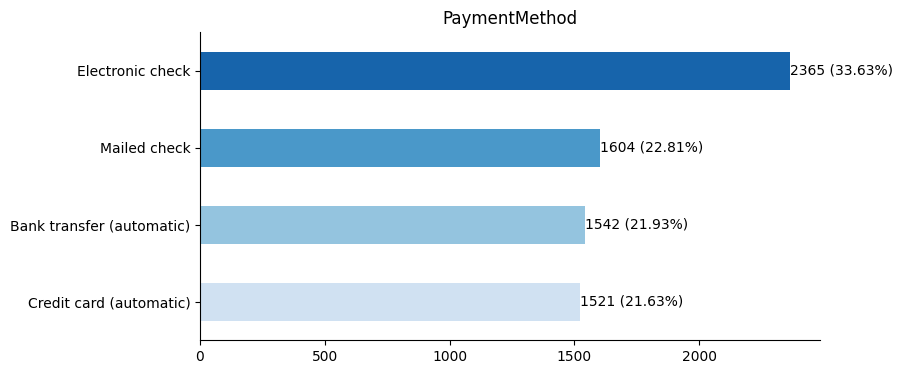

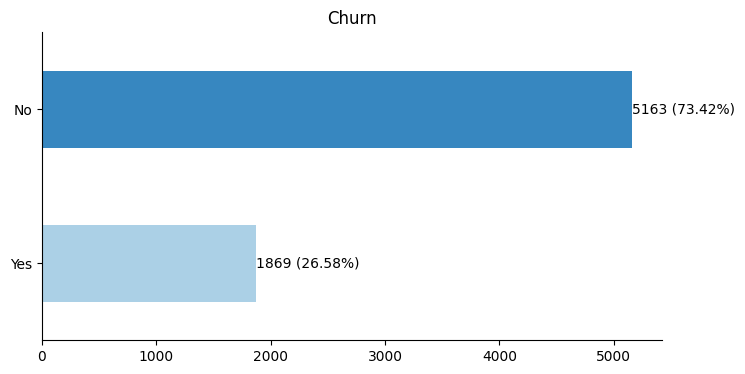

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    counts = df[col].value_counts().sort_values()
    counts.plot(kind='barh', color=sns.color_palette('Blues', len(counts)))

    for index, value in enumerate(counts):
        percentage = value / counts.sum() * 100
        plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center')

    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

#### Total Customers


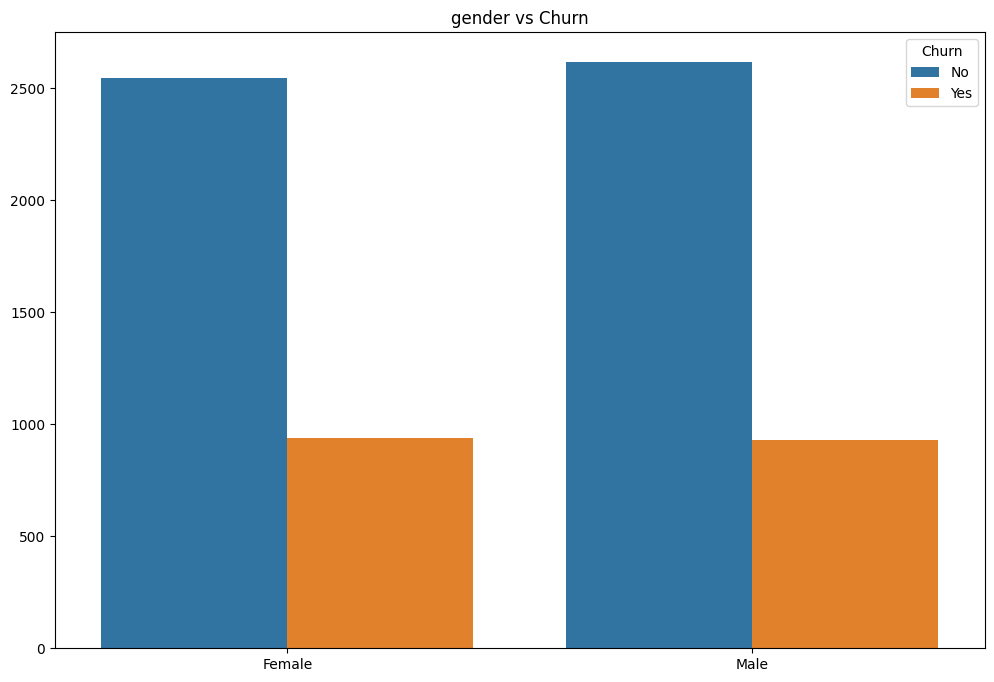

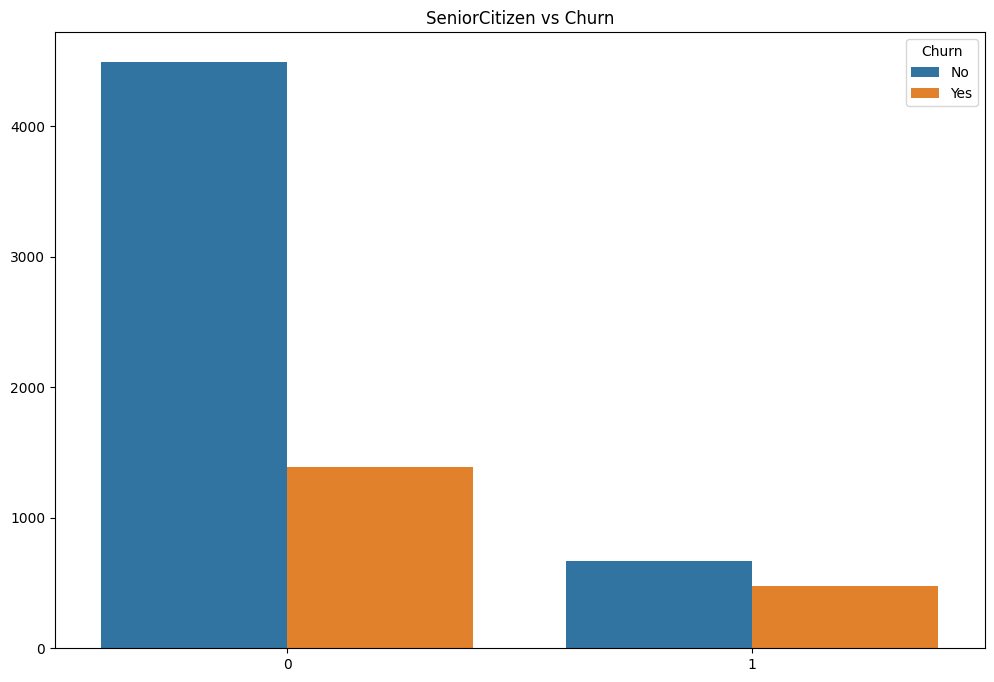

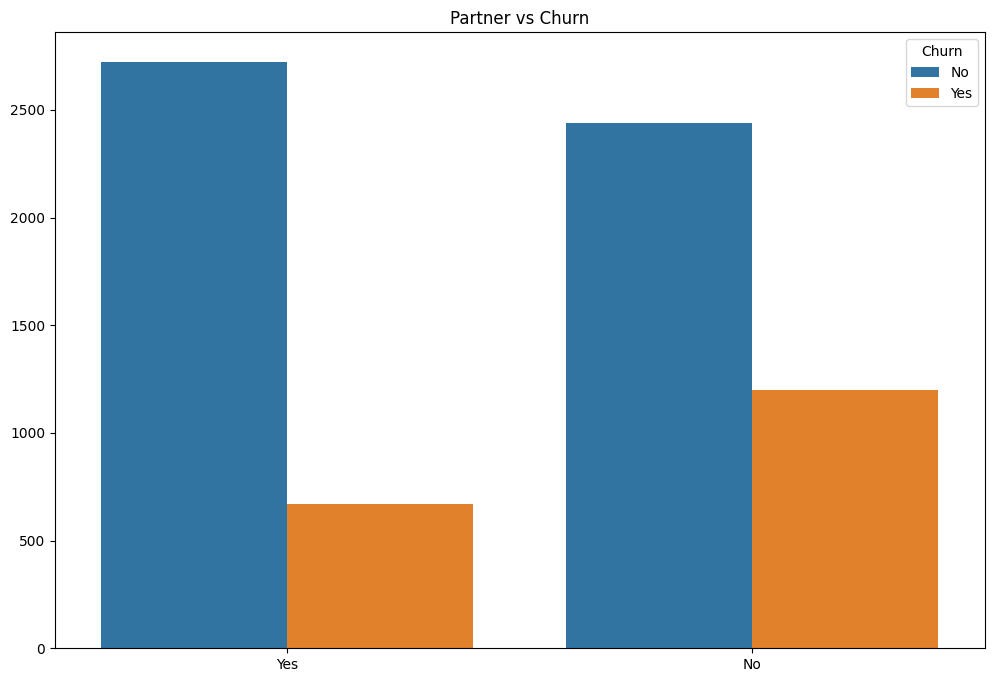

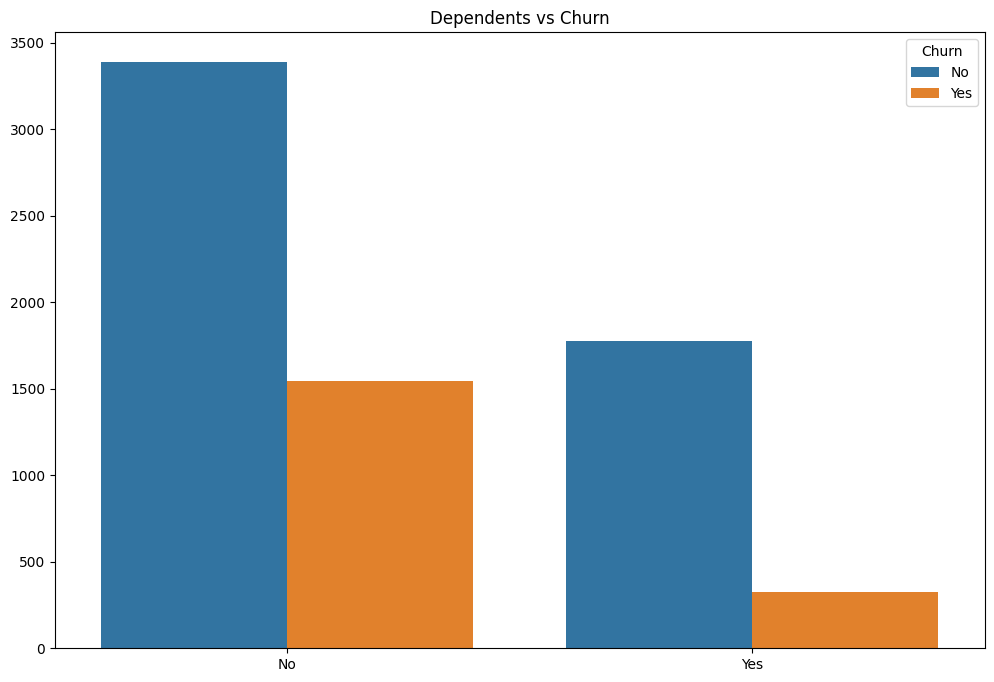

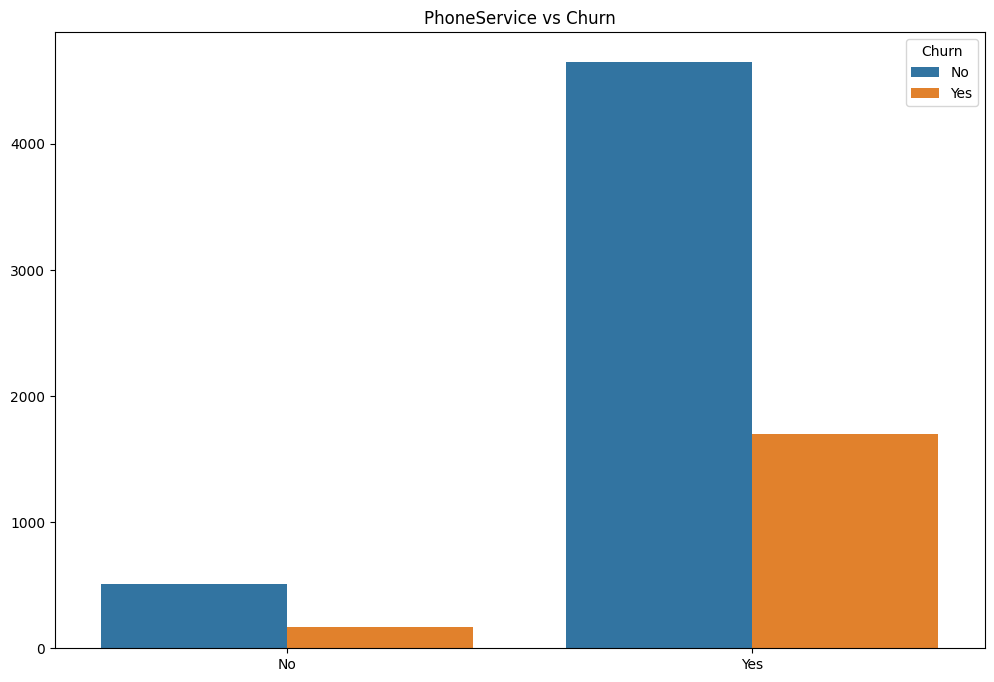

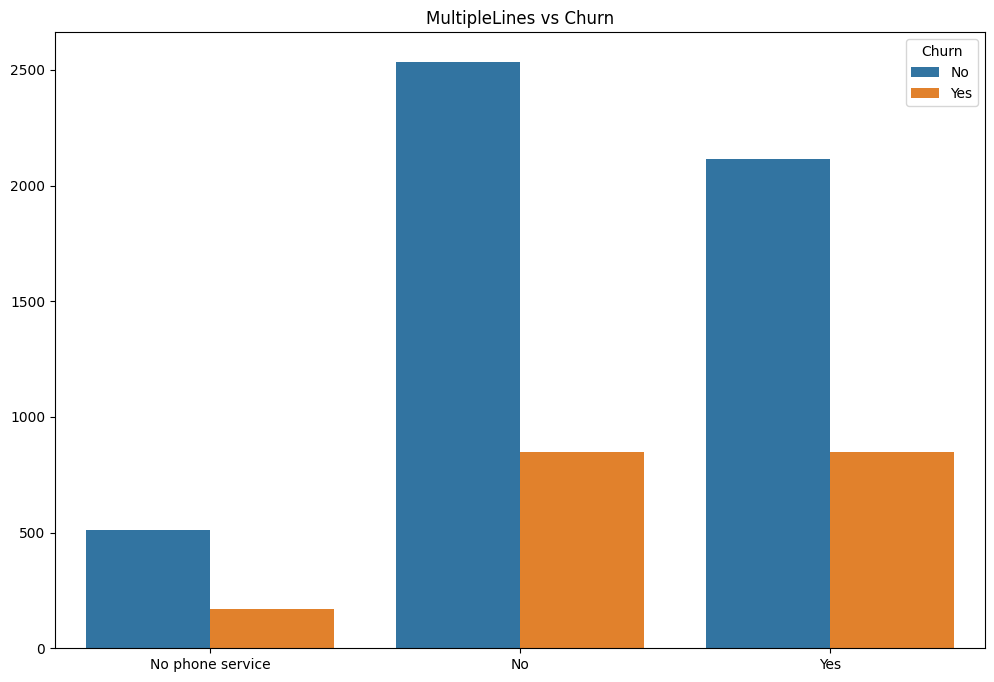

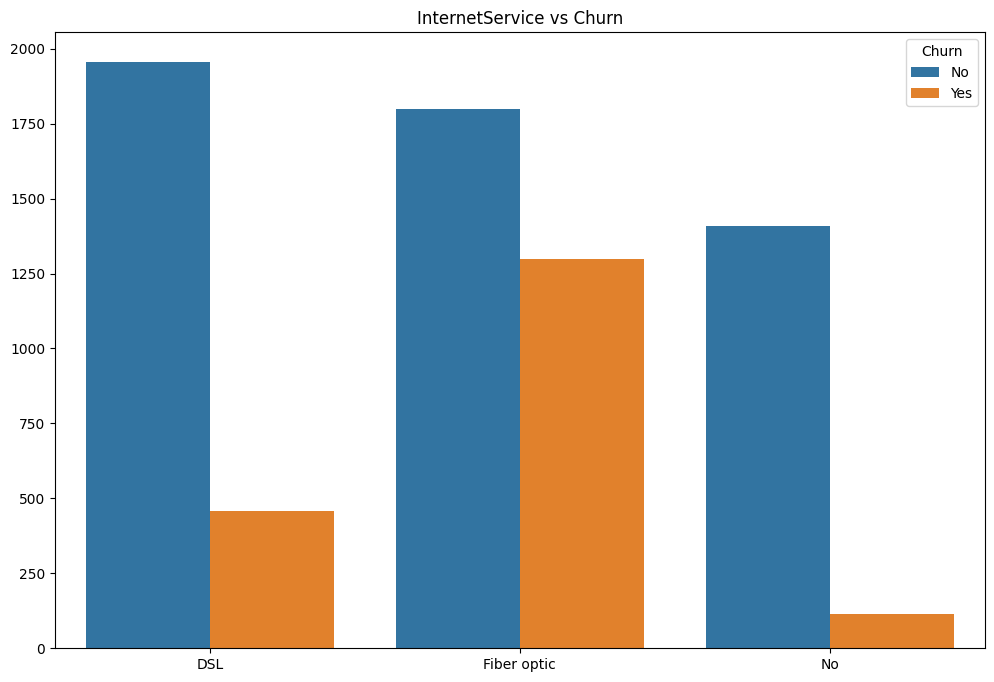

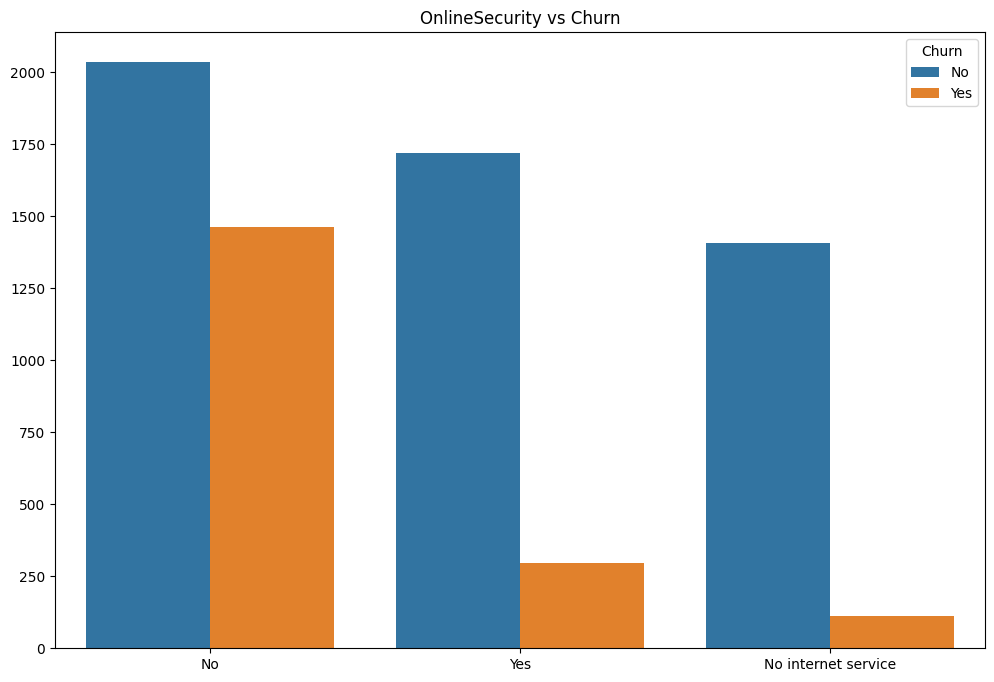

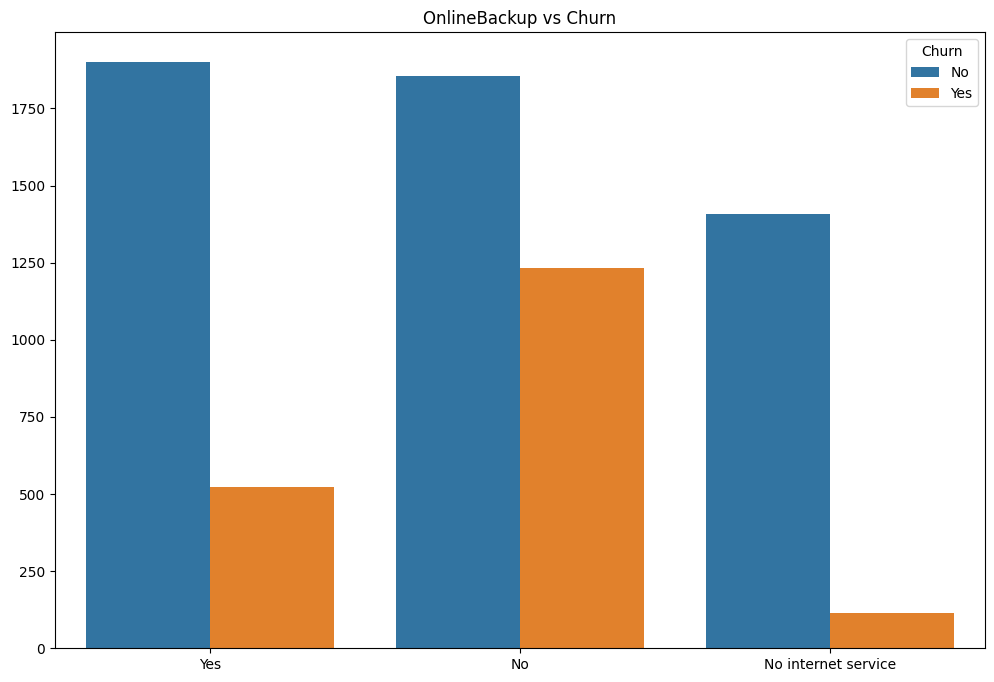

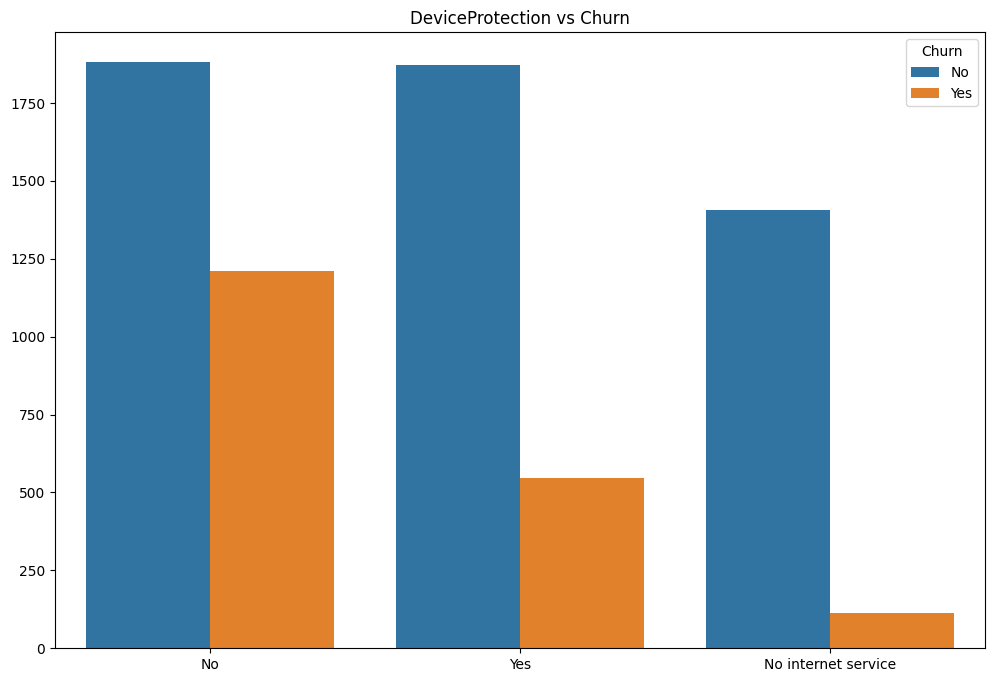

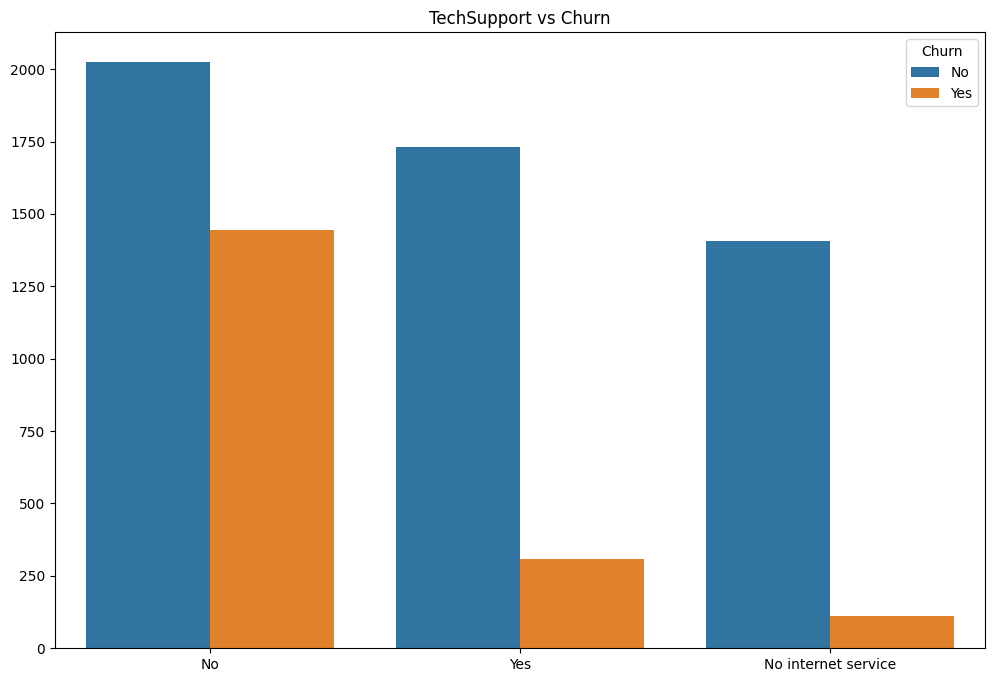

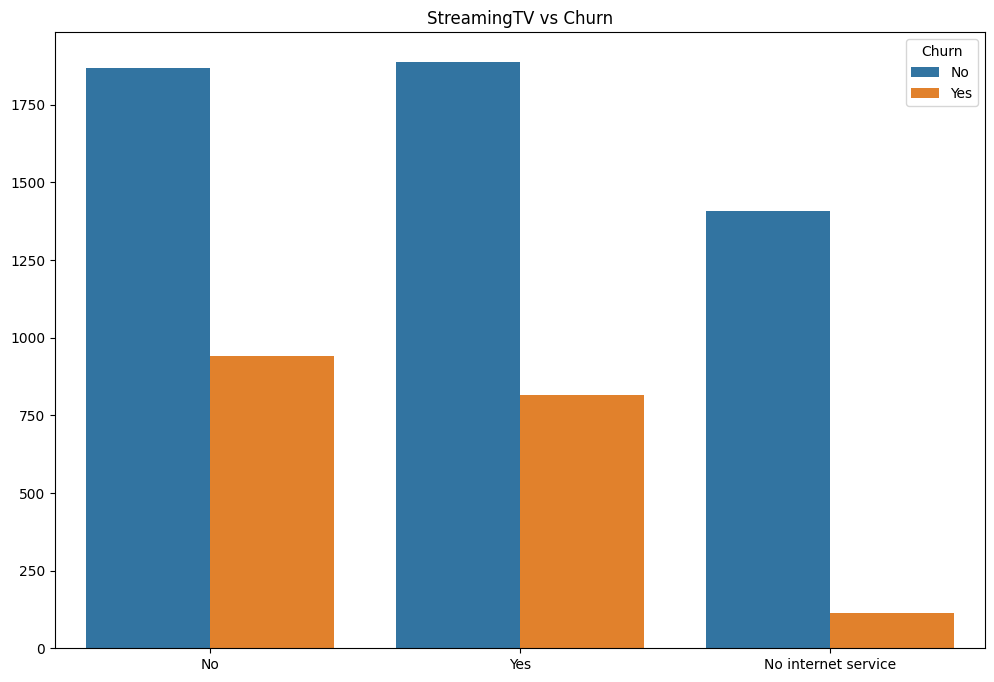

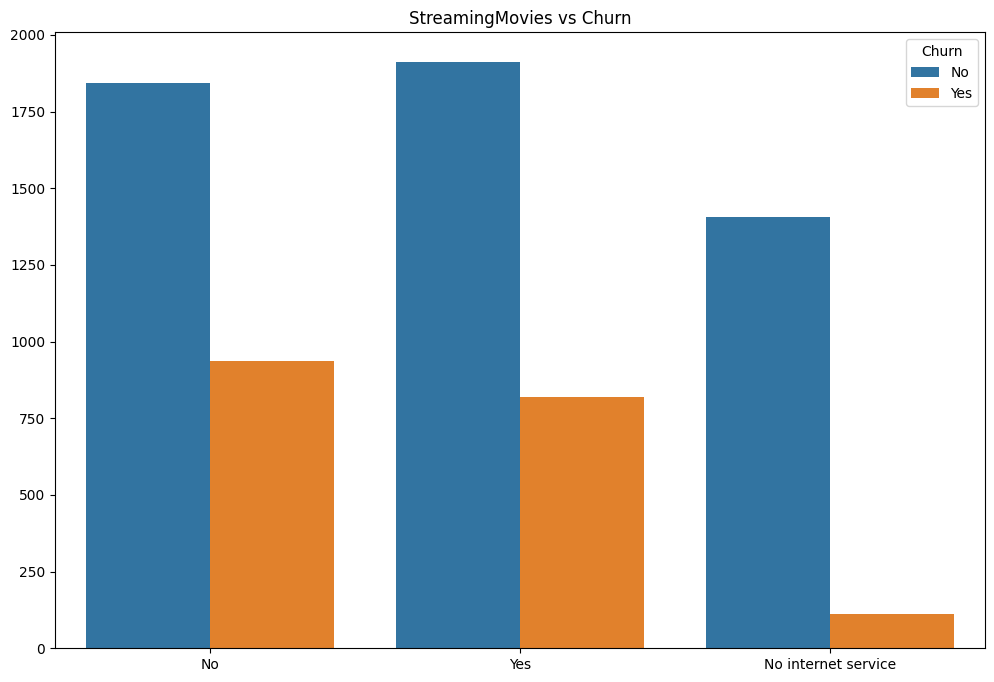

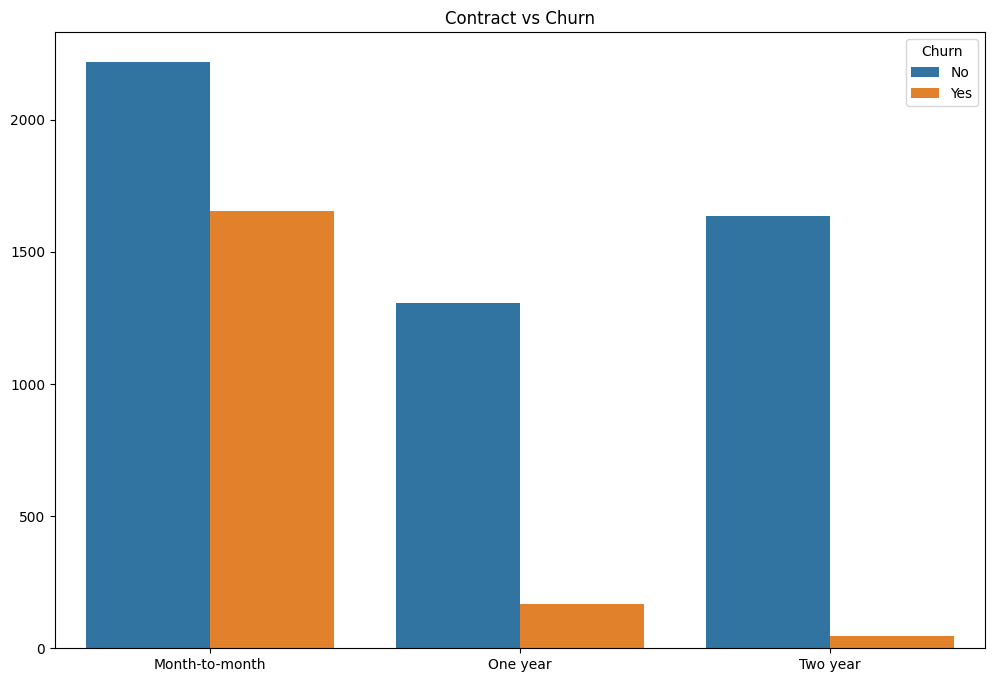

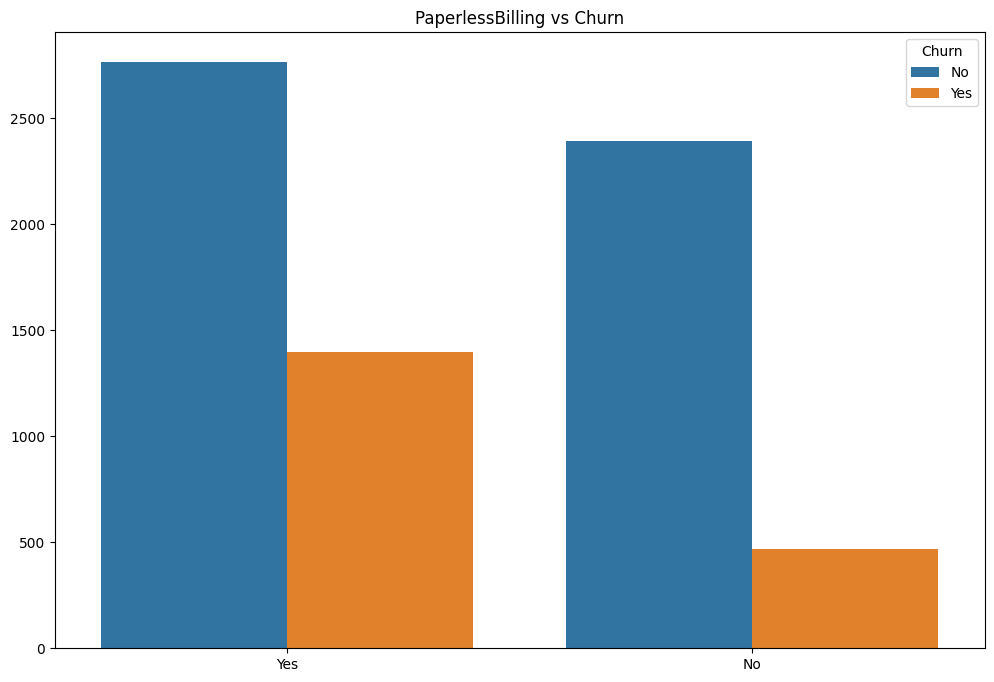

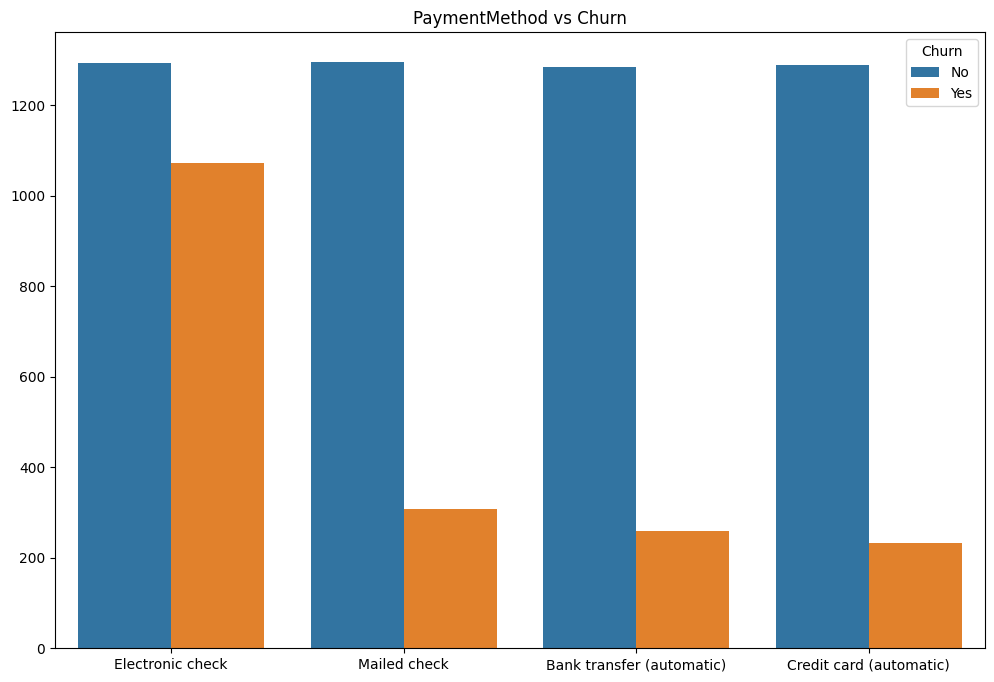

In [ ]:
for col in categorical_columns:
    if col != 'Churn':
        plt.figure(figsize=(12, 8))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'{col} vs Churn')
        plt.xlabel('')
        plt.ylabel('')
        plt.show()

#### Churned Customers

### Numerical Columns

#### Total Customers

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


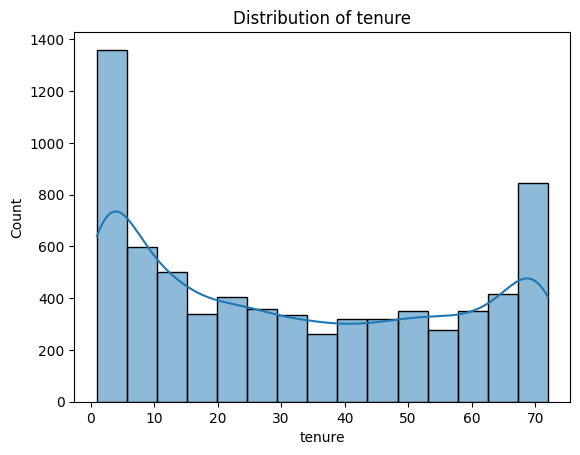

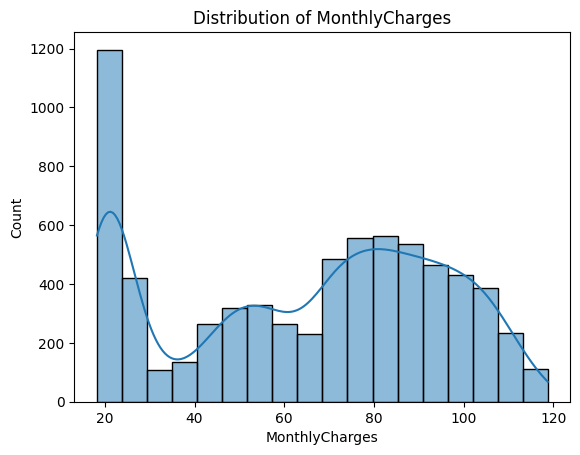

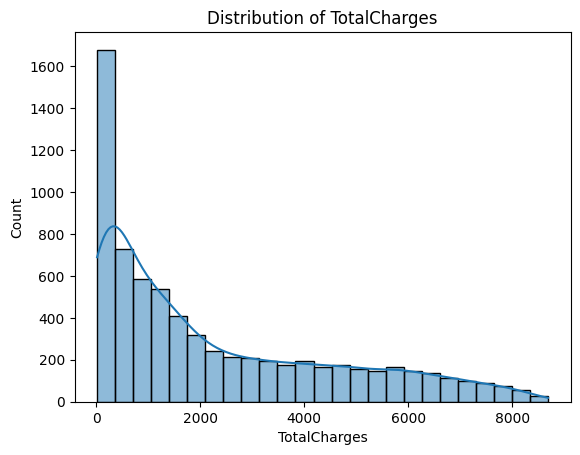

In [ ]:
for col in numerical_columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Churned Customers

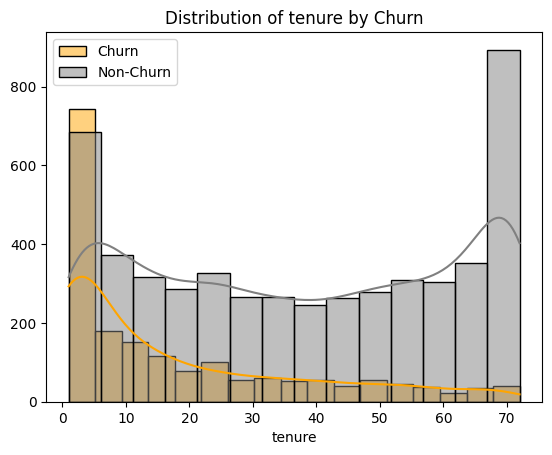

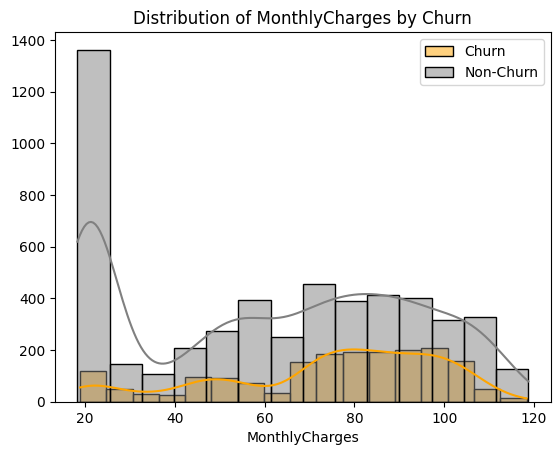

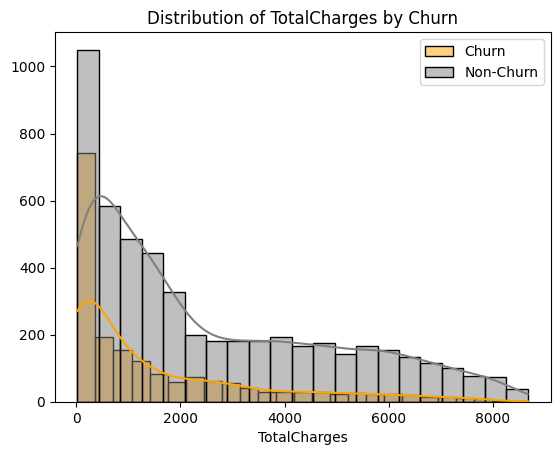

In [ ]:
for col in numerical_columns:
    sns.histplot(df_churn[col], kde=True, color='orange', label='Churn')
    sns.histplot(df_nonchurn[col], kde=True, color='gray', label='Non-Churn')

    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('')
    plt.legend()
    plt.show()

## Data Pre-Processing

### Encoding

**LabelEncoder and get_dummies**

In [ ]:
label_encoder_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

get_dummies_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [ ]:
for col in label_encoder_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

<ipython-input-9-b95deef70722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-9-b95deef70722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-9-b95deef70722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
df = pd.get_dummies(df, columns=get_dummies_cols)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


In [ ]:
# Convert boolean columns to 0 or 1
boolean_cols = ['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
                'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
                'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
                'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df[boolean_cols] = df[boolean_cols].astype(int)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


### Correlation

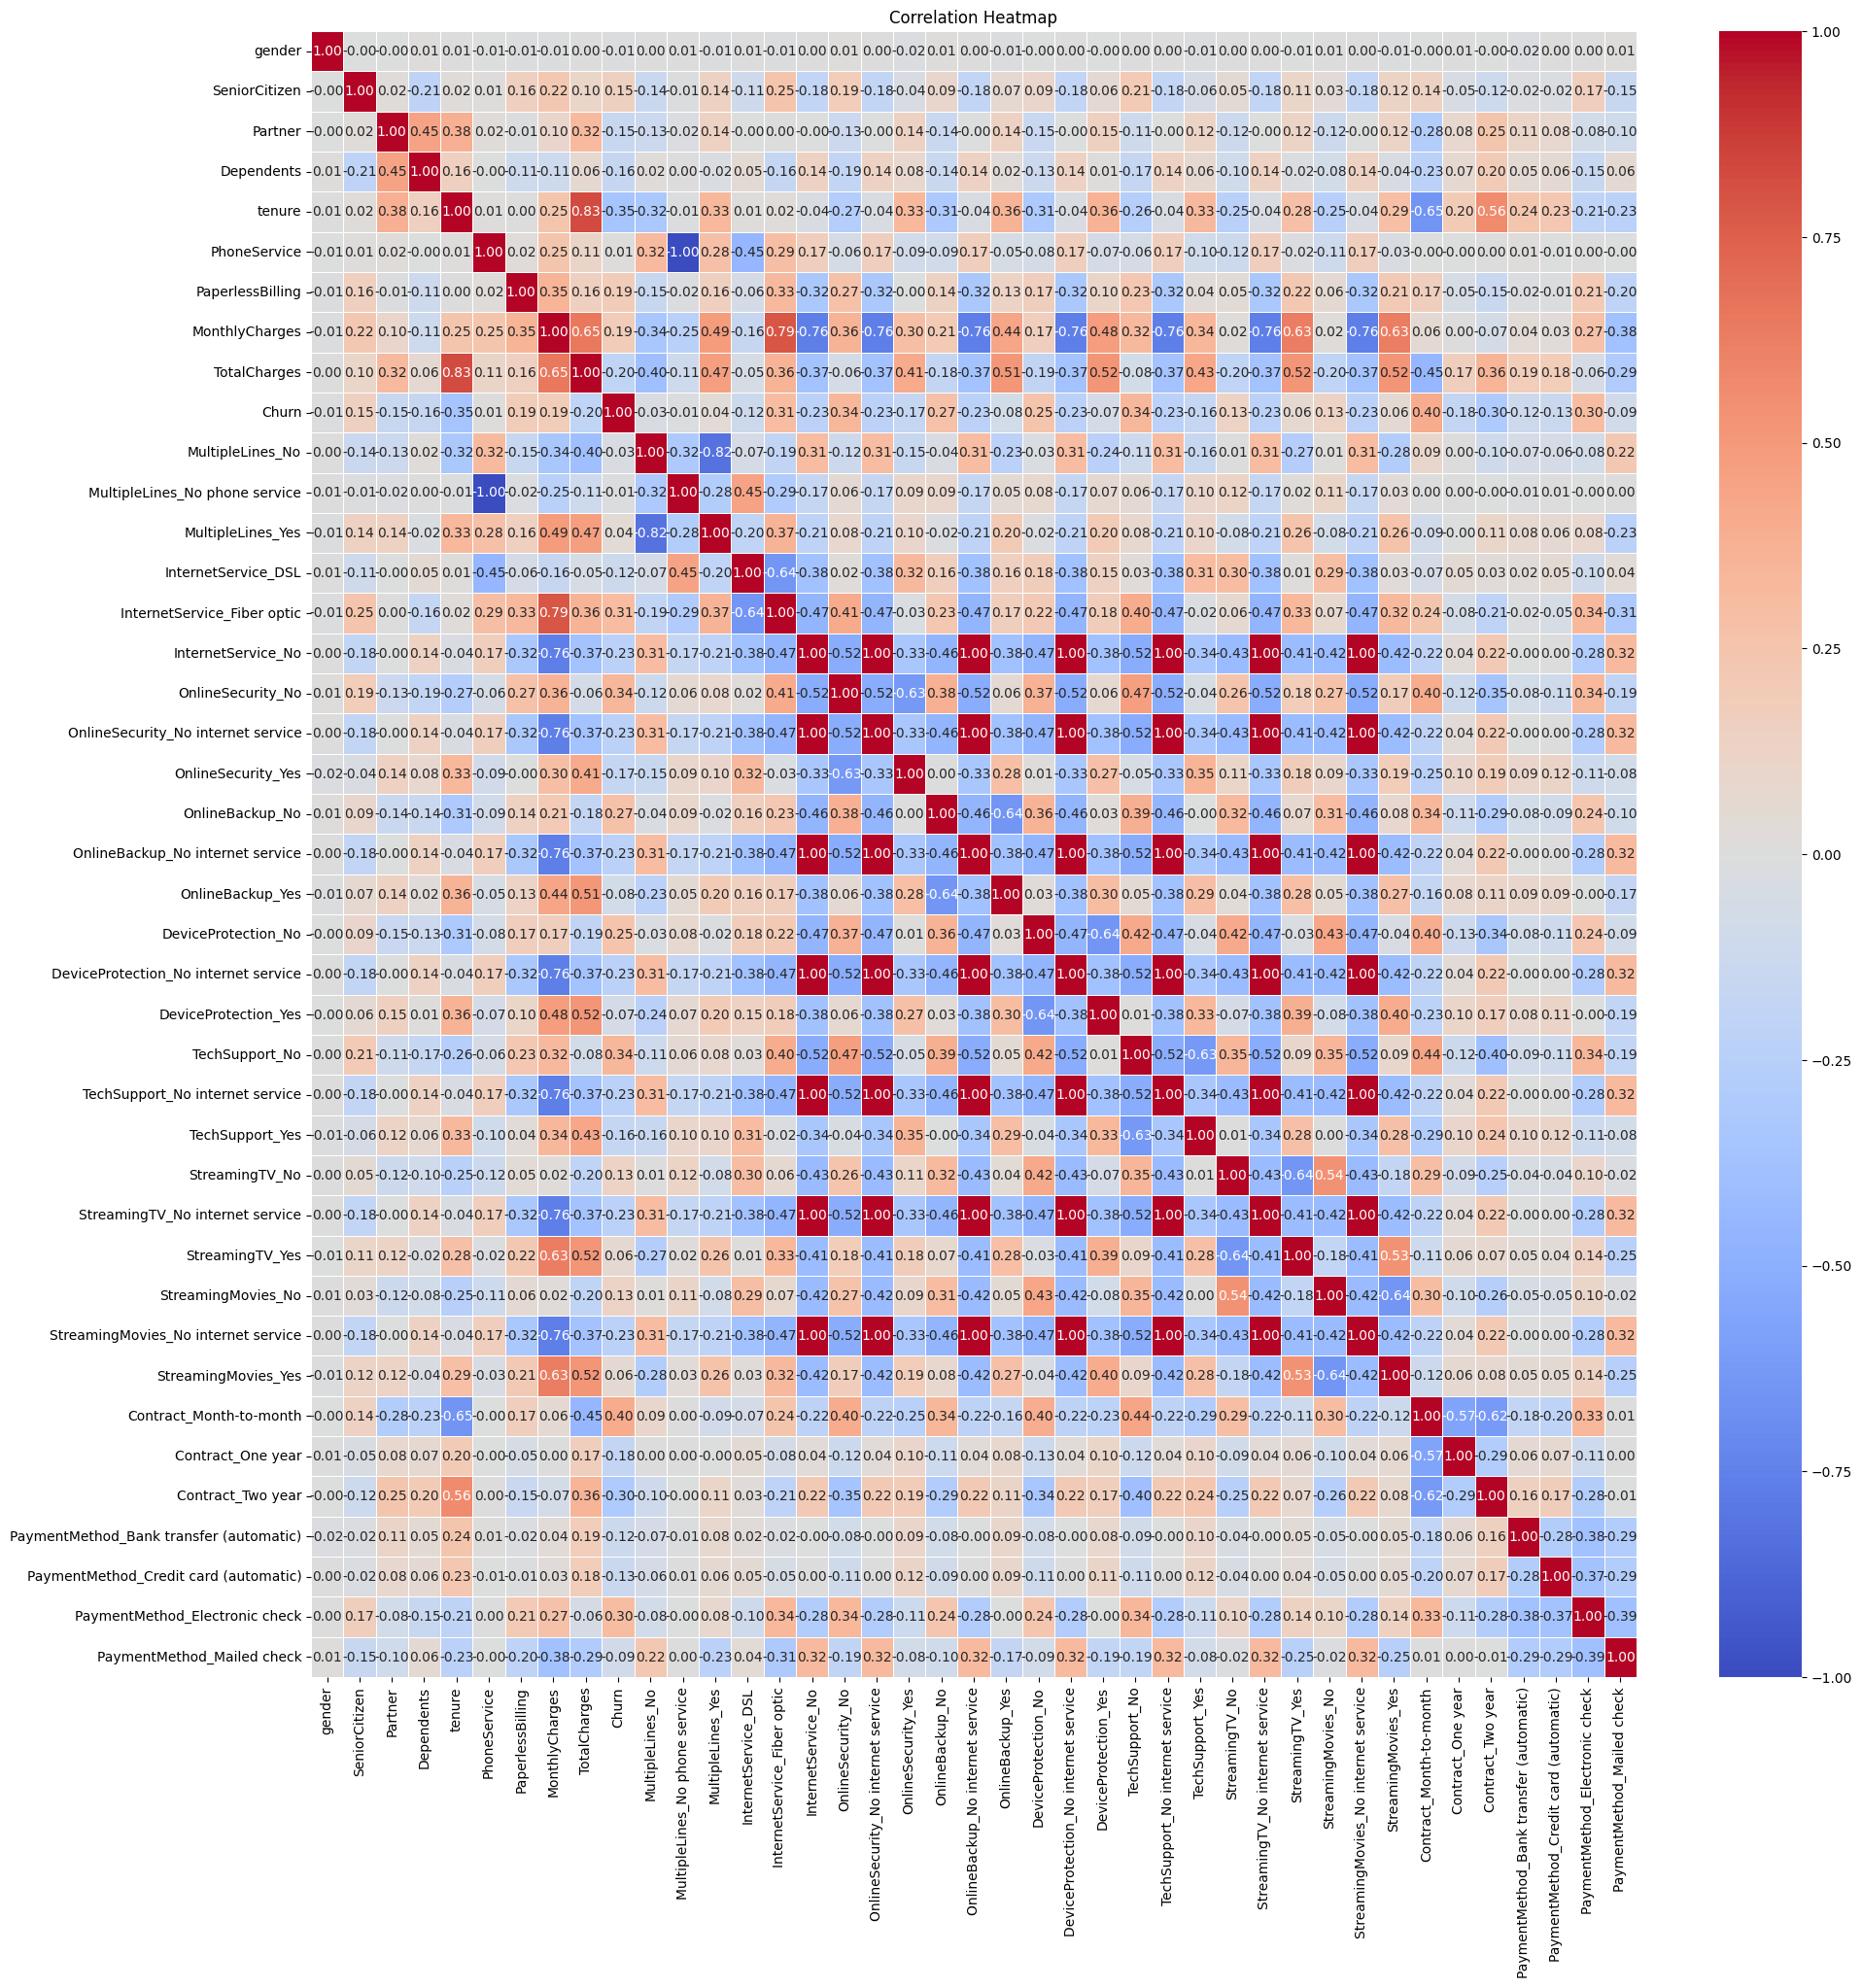

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(22, 22))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

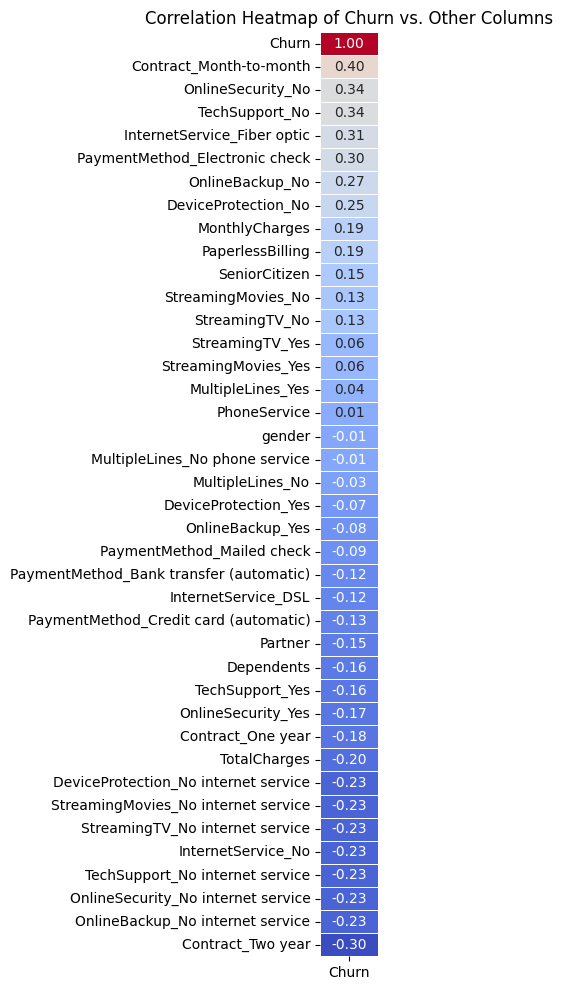

In [ ]:
# Extract correlations with Churn only
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)

# Select relevant columns for heatmap (excluding Churn itself)
columns_for_heatmap = corr_with_churn.index[:-1]  # Exclude 'Churn'

# Extract correlations as a DataFrame
corr_subset = pd.DataFrame(corr_with_churn[columns_for_heatmap])

# Plot heatmap
plt.figure(figsize=(0.75, 12))  # Adjust the width and height as needed
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap of Churn vs. Other Columns')
plt.show()

### Resampling

**SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.850000,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.950000,1889.500000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.850000,108.150000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.300000,1840.750000,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.700000,151.650000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,1,0,0,55,1,1,101.006833,5509.586153,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
10322,0,0,0,0,11,1,1,91.908973,1118.784208,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
10323,1,0,1,0,5,1,0,20.238354,127.263858,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
10324,0,0,0,0,2,1,1,78.950982,153.238826,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
y_resampled

0        0
1        0
2        1
3        0
4        1
        ..
10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, Length: 10326, dtype: int64

In [ ]:
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,1,29.850000,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,56.950000,1889.500000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,1,53.850000,108.150000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,42.300000,1840.750000,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.700000,151.650000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,1,0,0,55,1,1,101.006833,5509.586153,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
10322,0,0,0,0,11,1,1,91.908973,1118.784208,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
10323,1,0,1,0,5,1,0,20.238354,127.263858,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
10324,0,0,0,0,2,1,1,78.950982,153.238826,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1


In [ ]:
df.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Scaling

**StandardScaler**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

**Logistic Regression**

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1037
           1       0.86      0.83      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy: 84.85%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


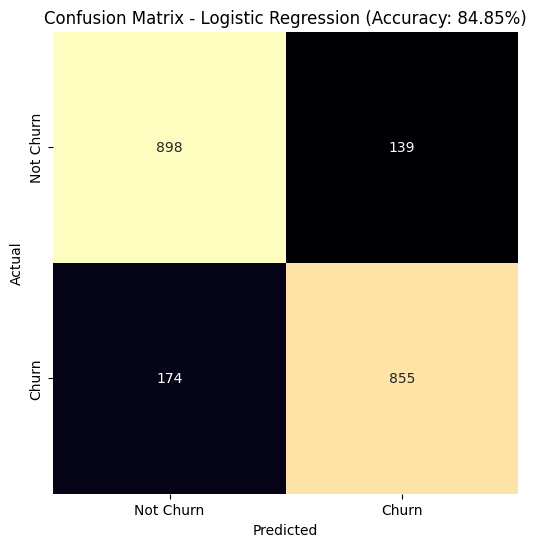

In [ ]:
# Creating a pipeline with scaling and logistic regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_pred = logreg_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, logreg_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, logreg_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Logistic Regression (Accuracy: {accuracy * 100:.2f}%)')
plt.show()

Logistic Regression with L2 Regularization:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1037
           1       0.86      0.83      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy: 85.14%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


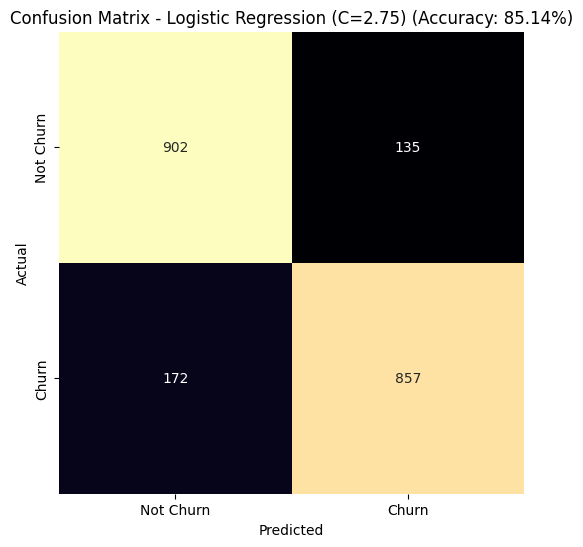

In [ ]:
# Train Logistic Regression model with L2 regularization
logreg_model_l2 = LogisticRegression(C=2.75, random_state=42)
logreg_model_l2.fit(X_train_scaled, y_train)
logreg_pred_l2 = logreg_model_l2.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression with L2 Regularization:")
print(classification_report(y_test, logreg_pred_l2))

# Calculate accuracy
accuracy = accuracy_score(y_test, logreg_pred_l2)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, logreg_pred_l2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Logistic Regression (C=2.75) (Accuracy: {accuracy * 100:.2f}%)')
plt.show()

**Decision Tree**

Decision Tree:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1037
           1       0.81      0.80      0.80      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Accuracy: 80.64%


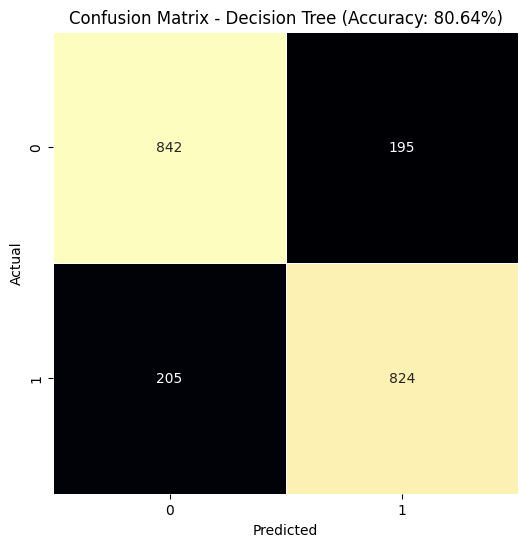

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluate Random Forest
print("Decision Tree:")
print(classification_report(y_test, dt_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, cmap='magma', fmt='d', linewidths=0.5, cbar=False)
plt.title(f'Confusion Matrix - Decision Tree (Accuracy: {accuracy * 100:.2f}%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.85      0.83      0.84      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy: 84.51%


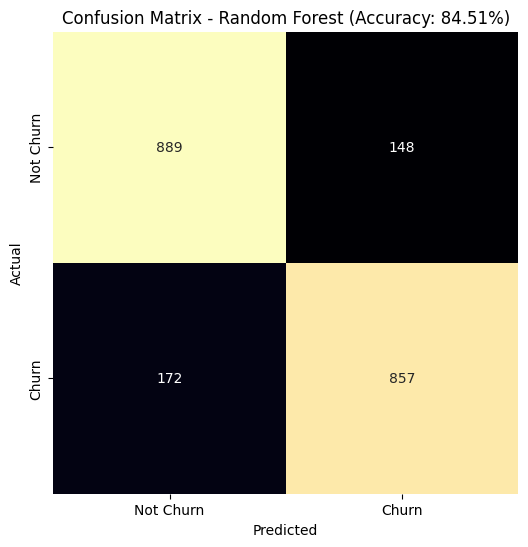

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest:")
print(classification_report(y_test, rf_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Random Forest (Accuracy: {accuracy * 100:.2f}%)')
plt.show()

**XGBoost**

XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1037
           1       0.86      0.83      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.84      0.84      2066

Accuracy: 84.46%


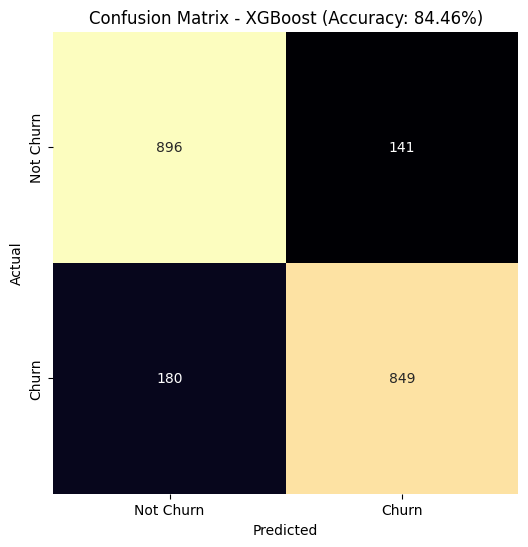

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost:")
print(classification_report(y_test, xgb_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - XGBoost (Accuracy: {accuracy * 100:.2f}%)')
plt.show()

**Linear SVC**

Linear SVC:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1037
           1       0.86      0.83      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy: 84.95%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


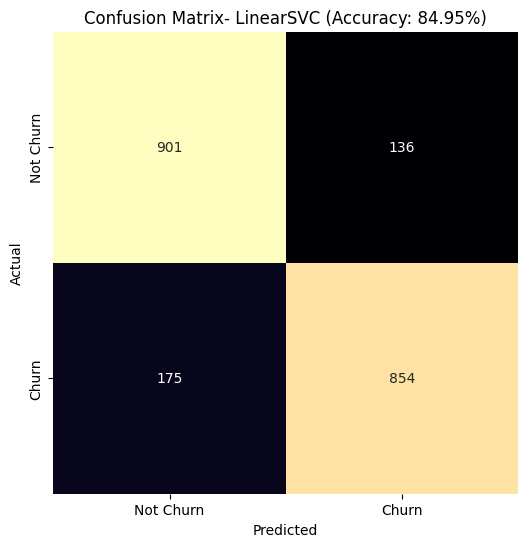

In [ ]:
# Linear SVC Classifier
svc_model = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

# Evaluate Linear SVC
print("Linear SVC:")
print(classification_report(y_test, svc_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix- LinearSVC (Accuracy: {accuracy * 100:.2f}%)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters for Linear SVC: {'linearsvc__C': 1, 'linearsvc__max_iter': 500}
Best cross-validation accuracy: 0.8527845036319613
Linear SVC:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1037
           1       0.86      0.83      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Accuracy: 84.90%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


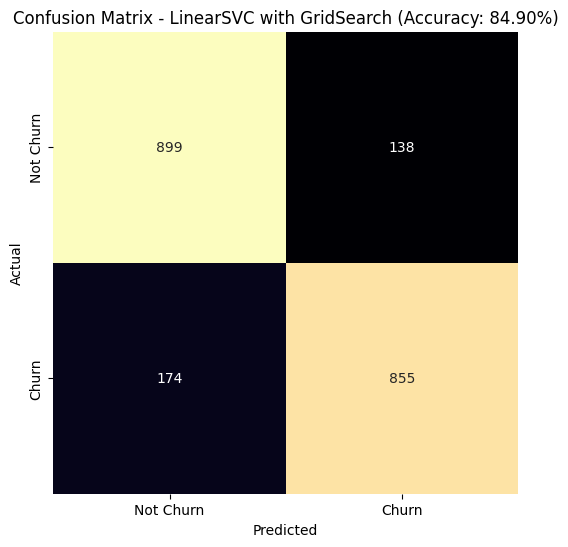

In [ ]:
# Define the pipeline with StandardScaler and LinearSVC
svc_pipe = make_pipeline(StandardScaler(), LinearSVC(random_state=42))

# Define parameters for GridSearchCV
svc_params = {
    'linearsvc__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'linearsvc__max_iter': [50, 100, 200, 500, 1000, 2000]  # Maximum iterations
}

# Perform GridSearchCV
svc_grid = GridSearchCV(svc_pipe, svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for Linear SVC:", svc_grid.best_params_)
print("Best cross-validation accuracy:", svc_grid.best_score_)

# Predict using the best model from GridSearchCV
svc_pred = svc_grid.predict(X_test)

# Evaluate Linear SVC
print("Linear SVC:")
print(classification_report(y_test, svc_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, svc_pred)
accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - LinearSVC with GridSearch (Accuracy: {accuracy * 100:.2f}%)')
plt.show()

### Feature Importance

**Best Model: Logistic Regression with C=2.75 (Accuracy: 85.14%)**

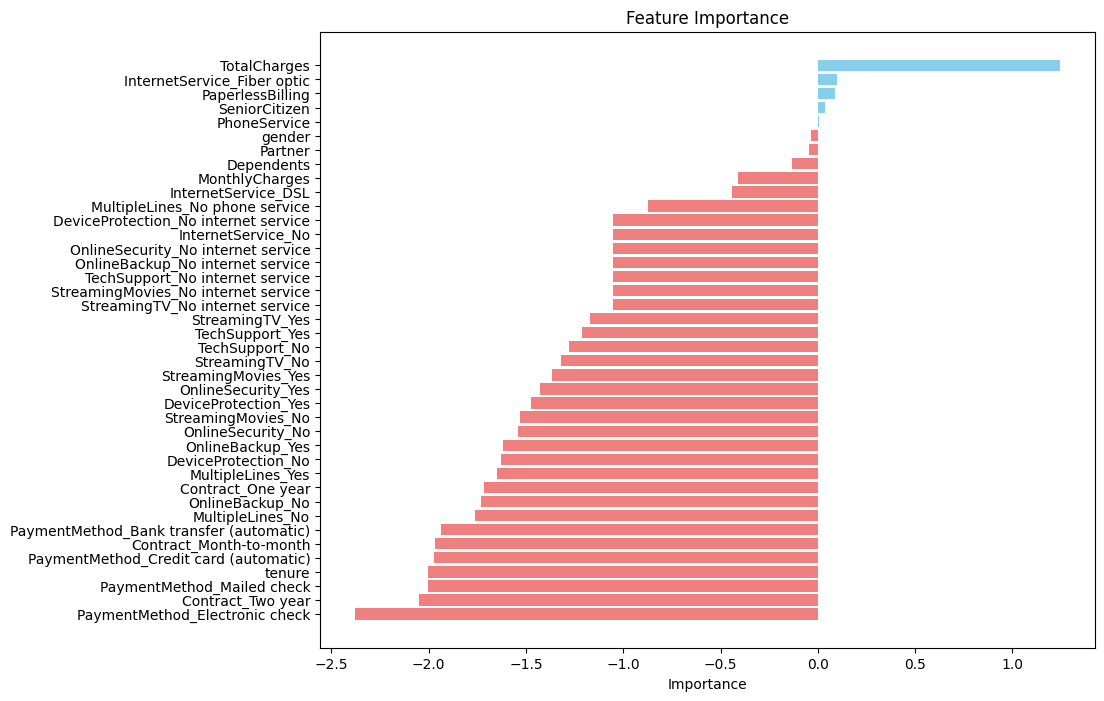

In [ ]:
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color=['skyblue' if imp > 0 else 'lightcoral' for imp in feature_importance['Importance']])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

<Axes: ylabel='Feature'>

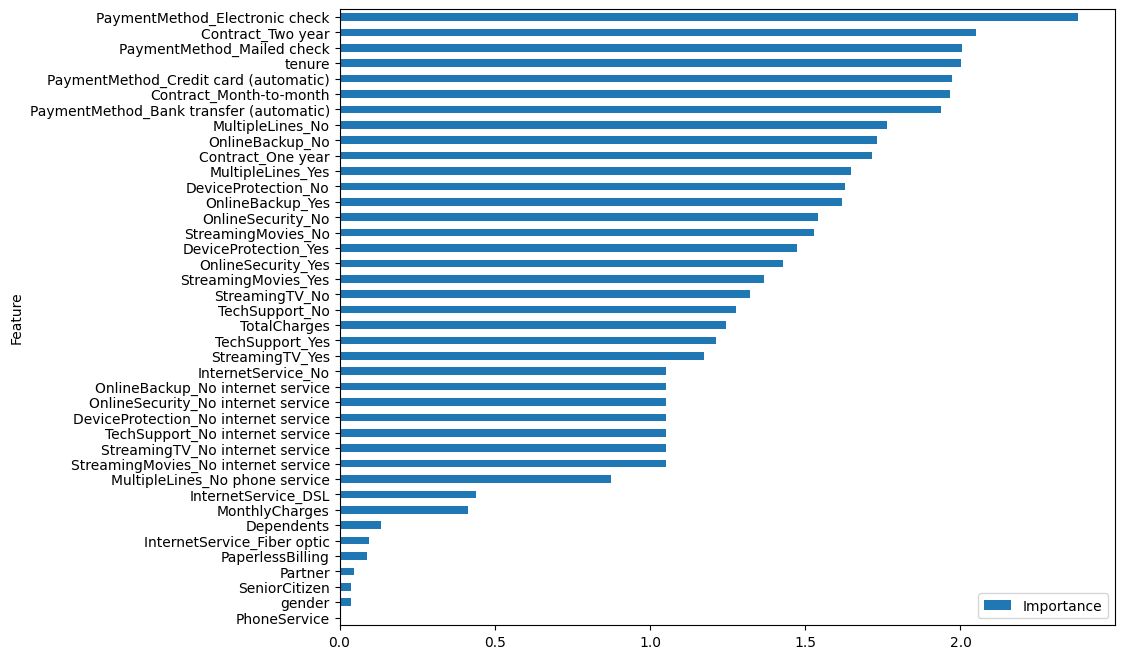

In [ ]:
coefficients = logreg_model_l2.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 8))

## Churn Risk Score and Categories

**Churn Risk Score Metrics:**
- SeniorCitizen: 0 for 1, 1 for 0
- Partner: 0 for Yes, 1 for No
- Dependents: 0 for Yes, 1 for No
- PhoneService: 0 for No, 1 for Yes
- MultipleLines: 0 for No phone service, 1 for Yes, 2 for No
- 2*InternetService: 0 for no, 1 for DSL, 2 for fiber optic
- Online Security: 0 for No internet service, 1 for Yes, 2 for No
- Online Backup: 0 for No internet service, 1 for Yes, 2 for No
- Device Protection: 0 for No internet service, 1 for Yes, 2 for No
- Tech Support: 0 for No internet service, 1 for Yes, 2 for No
- StreamingTV: 0 for No internet service, 1 for Yes, 2 for No
- StreamingMovies: 0 for No internet service, 1 for Yes, 2 for No
- 3*Contract: 0 for Two year, 1 for One year, 2 for Month-to-month
- PaperlessBilling: 0 for Yes, 1 for No
- 2*PaymentMethod: 0 for Credit card (automatic), 0 for Bank transfer (automatic), 2 for Mailed check, 3 for Electronic check
- MonthlyCharges: 0 for 0 to 20, 1 for 20 to 40, 3 for 40 to 60, 4 for 60 to 80, 5 for 80 and greater

<br>

Churn Risk Categories:
- Low: 0 to 10
- Medium: 11 to 20
- Medium High: 21 to 30
- High: 31 to 40


In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data = data.drop(['TotalCharges', 'tenure'], axis=1)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [ ]:
data_nonchurn = data[data['Churn'] == 'No']
data_nonchurn

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,No
7,6713-OKOMC,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,No
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No


In [ ]:
data_nonchurn.describe()

,SeniorCitizen,MonthlyCharges
count,5174.000000,5174.000000
mean,0.128721,61.265124
std,0.334923,31.092648
min,0.000000,18.250000
25%,0.000000,25.100000
50%,0.000000,64.425000
75%,0.000000,88.400000
max,1.000000,118.750000


In [ ]:
# Define the scoring functions
def senior_citizen_score(value):
    return 1 if value == 0 else 0

def partner_score(value):
    return 1 if value == 'No' else 0

def dependents_score(value):
    return 1 if value == 'No' else 0

def phone_service_score(value):
    return 1 if value == 'Yes' else 0

def multiple_lines_score(value):
    return 1 if value == 'Yes' else 0 if value == 'No' else 2

def internet_service_score(value):
    return 0 if value == 'No' else 1 if value == 'DSL' else 2

def online_security_score(value):
    return 0 if value == 'No internet service' else 1 if value == 'Yes' else 2

def online_backup_score(value):
    return 0 if value == 'No internet service' else 1 if value == 'Yes' else 2

def device_protection_score(value):
    return 0 if value == 'No internet service' else 1 if value == 'Yes' else 2

def tech_support_score(value):
    return 0 if value == 'No internet service' else 1 if value == 'Yes' else 2

def streaming_tv_score(value):
    return 0 if value == 'No internet service' else 1 if value == 'Yes' else 2

def streaming_movies_score(value):
    return 0 if value == 'No internet service' else 1 if value == 'Yes' else 2

def contract_score(value):
    return 2 if value == 'Month-to-month' else 1 if value == 'One year' else 0

def paperless_billing_score(value):
    return 1 if value == 'No' else 0

def payment_method_score(value):
    return 2 if value == 'Mailed check' else 3 if value == 'Electronic check' else 0

def monthly_charges_score(value):
    if value < 20:
        return 0
    elif 20 <= value < 40:
        return 1
    elif 40 <= value < 60:
        return 3
    elif 60 <= value < 80:
        return 4
    else:
        return 5

# Calculate the Churn Risk Score
data_nonchurn['Churn Risk Score'] = (
    data_nonchurn['SeniorCitizen'].apply(senior_citizen_score) +
    data_nonchurn['Partner'].apply(partner_score) +
    data_nonchurn['Dependents'].apply(dependents_score) +
    data_nonchurn['PhoneService'].apply(phone_service_score) +
    data_nonchurn['MultipleLines'].apply(multiple_lines_score) +
    2 * data_nonchurn['InternetService'].apply(internet_service_score) +
    data_nonchurn['OnlineSecurity'].apply(online_security_score) +
    data_nonchurn['OnlineBackup'].apply(online_backup_score) +
    data_nonchurn['DeviceProtection'].apply(device_protection_score) +
    data_nonchurn['TechSupport'].apply(tech_support_score) +
    data_nonchurn['StreamingTV'].apply(streaming_tv_score) +
    data_nonchurn['StreamingMovies'].apply(streaming_movies_score) +
    3 * data_nonchurn['Contract'].apply(contract_score) +
    data_nonchurn['PaperlessBilling'].apply(paperless_billing_score) +
    2 * data_nonchurn['PaymentMethod'].apply(payment_method_score) +
    data_nonchurn['MonthlyCharges'].apply(monthly_charges_score)
)

<ipython-input-6-00fc68829be4>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nonchurn['Churn Risk Score'] = (


In [ ]:
# Define the Churn Risk Category
def churn_risk_category(score):
    if 0 <= score <= 10:
        return 'Low Risk'
    elif 11 <= score <= 20:
        return 'Medium Risk'
    elif 21 <= score <= 30:
        return 'Medium High Risk'
    elif 31 <= score <= 40:
        return 'High Risk'
    else:
        return 'Unknown Risk'

# Add Churn Risk Category
data_nonchurn['Churn Risk Category'] = data_nonchurn['Churn Risk Score'].apply(churn_risk_category)

<ipython-input-7-9d0d24768f45>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nonchurn['Churn Risk Category'] = data_nonchurn['Churn Risk Score'].apply(churn_risk_category)


In [ ]:
data_nonchurn[['customerID', 'Churn Risk Score', 'Churn Risk Category']]

,customerID,Churn Risk Score,Churn Risk Category
0,7590-VHVEG,30,Medium High Risk
1,5575-GNVDE,27,Medium High Risk
3,7795-CFOCW,23,Medium High Risk
6,1452-KIOVK,29,Medium High Risk
7,6713-OKOMC,30,Medium High Risk
...,...,...,...
7037,2569-WGERO,5,Low Risk
7038,6840-RESVB,24,Medium High Risk
7039,2234-XADUH,23,Medium High Risk
7040,4801-JZAZL,29,Medium High Risk


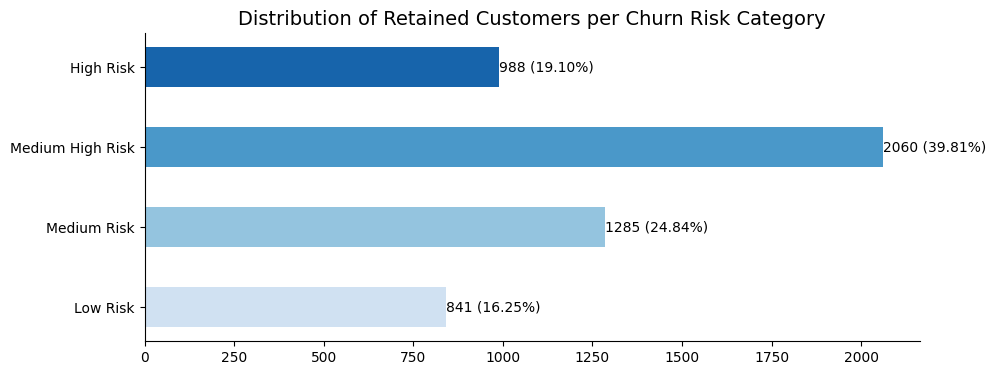

In [ ]:
# Count the number of occurrences of each Churn Risk Category
churn_risk_categories = ['Low Risk', 'Medium Risk', 'Medium High Risk', 'High Risk']
churn_risk_category_counts = data_nonchurn['Churn Risk Category'].value_counts().loc[churn_risk_categories]

# Plot the horizontal bar graph with the Blues palette
plt.figure(figsize=(10, 4))

# Define bar height
bar_height = 0.5
bars = plt.barh(y=churn_risk_category_counts.index, width=churn_risk_category_counts.values, color=sns.color_palette('Blues', len(churn_risk_categories)), height=bar_height)

# Remove top and right borders
sns.despine()

# Add count and percent annotations
for bar, count in zip(bars, churn_risk_category_counts.values):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
             f'{count} ({count / len(data_nonchurn) * 100:.2f}%)',
             va='center', fontsize=10)

plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Retained Customers per Churn Risk Category', fontsize=14)
plt.show()